# Exploratory Data Analysis (EDA)
## Forest Cover Type Dataset

This notebook performs exploratory data analysis on the Forest Cover Type dataset to understand:
- Class distribution
- Feature correlations
- Data characteristics

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## 2. Setup Directories

In [2]:
base_dir = os.path.abspath('../..')
image_dir = os.path.join(base_dir, 'images', 'Chapter-7')
os.makedirs(image_dir, exist_ok=True)
data_path = os.path.join(base_dir, 'data_95_v2', 'advanced_data_v2.npz')

print(f"Base directory: {base_dir}")
print(f"Image directory: {image_dir}")
print(f"Data path: {data_path}")

Base directory: C:\PYTHON\AIT511 Course Project 2\archive
Image directory: C:\PYTHON\AIT511 Course Project 2\archive\images\Chapter-7
Data path: C:\PYTHON\AIT511 Course Project 2\archive\data_95_v2\advanced_data_v2.npz


## 3. Load Data

In [3]:
print("Loading Data for EDA...")
if not os.path.exists(data_path):
    print(f"Error: {data_path} not found!")
    raise FileNotFoundError(f"Data file not found: {data_path}")

data = np.load(data_path)
print(f"✓ Data loaded successfully")
print(f"\nAvailable arrays in the data file:")
for key in data.keys():
    print(f"  - {key}: {data[key].shape}")

Loading Data for EDA...
✓ Data loaded successfully

Available arrays in the data file:


  - X_cont_train: (493860, 32)
  - X_cont_test: (87152, 32)
  - X_wild_train: (493860,)
  - X_wild_test: (87152,)
  - X_soil_train: (493860,)
  - X_soil_test: (87152,)
  - y_train_cat: (493860, 7)
  - y_test_cat: (87152, 7)


## 4. Prepare Labels for Analysis

In [4]:
y_train_cat = data['y_train_cat']
y_test_cat = data['y_test_cat']
y_train = np.argmax(y_train_cat, axis=1) + 1
y_test = np.argmax(y_test_cat, axis=1) + 1
y_all = np.concatenate([y_train, y_test])

print(f"Total samples: {len(y_all):,}")
print(f"Training samples: {len(y_train):,}")
print(f"Test samples: {len(y_test):,}")

Total samples: 581,012
Training samples: 493,860
Test samples: 87,152


## 5. Define Class Names

In [5]:
classes = [1, 2, 3, 4, 5, 6, 7]
class_names = [
    'Spruce/Fir', 
    'Lodgepole Pine', 
    'Ponderosa Pine', 
    'Cottonwood/Willow', 
    'Aspen', 
    'Douglas-fir', 
    'Krummholz'
]

unique, counts = np.unique(y_all, return_counts=True)
print("\nClass Distribution:")
print("=" * 50)
for cls, name, count in zip(unique, class_names, counts):
    percentage = (count / len(y_all)) * 100
    print(f"Class {cls} ({name:20s}): {count:6,} ({percentage:5.2f}%)")


Class Distribution:
Class 1 (Spruce/Fir          ): 211,840 (36.46%)
Class 2 (Lodgepole Pine      ): 283,301 (48.76%)
Class 3 (Ponderosa Pine      ): 35,754 ( 6.15%)
Class 4 (Cottonwood/Willow   ):  2,747 ( 0.47%)
Class 5 (Aspen               ):  9,493 ( 1.63%)
Class 6 (Douglas-fir         ): 17,367 ( 2.99%)
Class 7 (Krummholz           ): 20,510 ( 3.53%)


## 6. Visualize Class Distribution

Generating Class Distribution Plot...


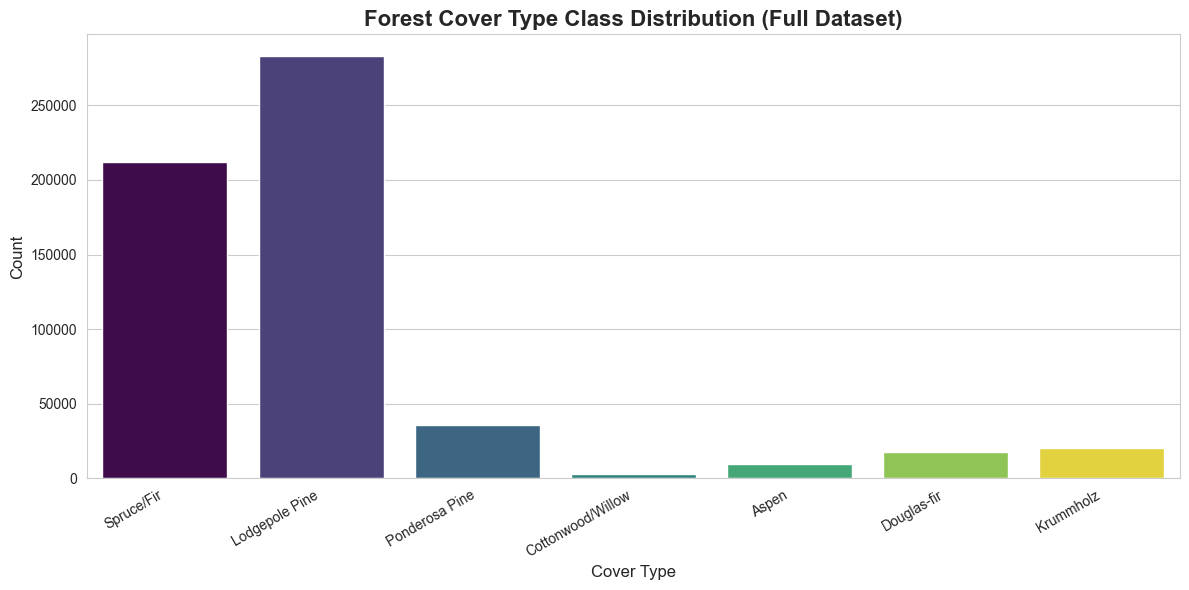

✓ Class distribution plot saved


In [6]:
print("Generating Class Distribution Plot...")
plt.figure(figsize=(12, 6))
sns.countplot(x=y_all, hue=y_all, palette='viridis', legend=False)
plt.title('Forest Cover Type Class Distribution (Full Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(7), labels=class_names, rotation=30, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'eda_class_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Class distribution plot saved")

## 7. Define Feature Names

In [7]:
feature_names = [
    'Elevation', 'Aspect', 'Slope', 'H_Dist_Hydro', 'V_Dist_Hydro', 
    'H_Dist_Road', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'H_Dist_Fire'
]

## 8. Load Continuous Features

In [8]:
print("Loading continuous features...")
X_cont_train = data['X_cont_train']
print(f"Shape: {X_cont_train.shape}")

num_features = X_cont_train.shape[1]
if num_features == 10:
    cols = feature_names
else:
    print(f"Warning: Expected 10 features, found {num_features}. Using extended names.")
    if num_features > 10:
        cols = feature_names + [f'Eng_Feat_{i}' for i in range(num_features - 10)]
    else:
        cols = [f'Feat_{i}' for i in range(num_features)]

print(f"\nTotal features to analyze: {len(cols)}")

Loading continuous features...


Shape: (493860, 32)

Total features to analyze: 32


## 9. Create DataFrame for Analysis

In [9]:
df_cont = pd.DataFrame(X_cont_train, columns=cols)
print("DataFrame created successfully")
print(f"Shape: {df_cont.shape}")
print(f"\nFirst few rows:")
df_cont.head()

DataFrame created successfully
Shape: (493860, 32)

First few rows:


,Elevation,Aspect,Slope,H_Dist_Hydro,V_Dist_Hydro,H_Dist_Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Dist_Fire,...,Eng_Feat_12,Eng_Feat_13,Eng_Feat_14,Eng_Feat_15,Eng_Feat_16,Eng_Feat_17,Eng_Feat_18,Eng_Feat_19,Eng_Feat_20,Eng_Feat_21
0,-0.881690,0.333333,0.840580,0.725806,-0.623371,0.212121,0.916667,0.142857,-1.120577,-0.963585,...,-0.192,1.223350,-1.066343,0.218306,-0.698934,-0.555556,-1.249847,-1.037464,-0.242322,-1.033039
1,0.098592,0.777778,0.688406,1.483871,1.066966,0.212121,-1.458333,-1.061224,1.887287,-0.120448,...,0.420,0.233503,1.636246,-0.187469,0.986464,1.144992,1.774036,2.018732,0.343319,0.221254
2,-0.115493,-0.222222,-0.007246,-0.483871,1.016180,0.636364,0.083333,-0.489796,0.211009,0.008403,...,-0.116,-0.060914,0.771845,1.009300,0.908942,1.126557,0.161053,0.230548,0.461701,-0.551884
3,-0.923944,-0.222222,0.840580,0.725806,-0.602697,0.636364,0.208333,-0.448980,-0.841415,-1.005602,...,-0.222,1.261421,-0.913592,0.032305,-0.686218,-0.525162,-0.998163,-0.719741,0.391863,-0.682829
4,1.625352,0.444444,0.438406,2.516129,-0.164944,0.818182,-0.500000,-1.040816,-0.117955,1.218487,...,1.366,-1.317259,-0.241100,-0.031326,0.084495,-0.490782,0.232088,-0.576369,0.511475,-0.370574


## 10. Statistical Summary

In [10]:
print("Statistical Summary of Features:")
df_cont.describe()

Statistical Summary of Features:


,Elevation,Aspect,Slope,H_Dist_Hydro,V_Dist_Hydro,H_Dist_Road,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,H_Dist_Fire,...,Eng_Feat_12,Eng_Feat_13,Eng_Feat_14,Eng_Feat_15,Eng_Feat_16,Eng_Feat_17,Eng_Feat_18,Eng_Feat_19,Eng_Feat_20,Eng_Feat_21
count,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,...,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000,493860.000000
mean,-0.102695,0.122854,0.186168,0.264800,0.158603,-0.177855,-0.111846,-0.009328,0.177619,-0.108892,...,-0.000149,0.063043,0.137844,0.100267,0.128152,0.173567,0.132633,0.190564,-0.124657,-0.128229
std,0.788779,0.832029,0.769952,0.939786,0.700953,0.811044,0.823849,0.781104,0.867730,0.786142,...,0.799985,0.749239,0.762873,0.821220,0.690021,0.737623,0.853179,0.945555,0.535333,0.530757
min,-3.202817,-1.444444,-0.789855,-3.161290,-0.898427,-6.606061,-9.416667,-2.918367,-1.120577,-3.109244,...,-2.710000,-1.954315,-1.250809,-3.026432,-1.262100,-1.138017,-1.646663,-1.551873,-1.058869,-1.033508
25%,-0.526761,-0.444444,-0.398551,-0.370968,-0.401348,-0.606061,-0.541667,-0.489796,-0.449541,-0.529412,...,-0.502000,-0.474619,-0.440453,-0.426334,-0.414274,-0.389636,-0.465401,-0.438040,-0.615738,-0.624941
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.473239,0.555556,0.601449,0.629032,0.598652,0.393939,0.458333,0.510204,0.550459,0.470588,...,0.498000,0.525381,0.559547,0.573666,0.585726,0.610364,0.534599,0.561960,0.384262,0.375059
max,2.428169,5.888889,4.271739,9.209678,2.300225,1.090909,1.166667,2.265306,3.579292,2.308123,...,3.430000,3.073604,2.782201,3.065100,2.140279,2.477828,3.109002,4.188761,0.519154,0.506719


## 11. Correlation Analysis

In [11]:
print("Calculating correlation matrix...")
corr = df_cont.corr()
print("✓ Correlation matrix computed")

Calculating correlation matrix...


✓ Correlation matrix computed


## 12. Visualize Correlation Heatmap

Generating Correlation Heatmap...


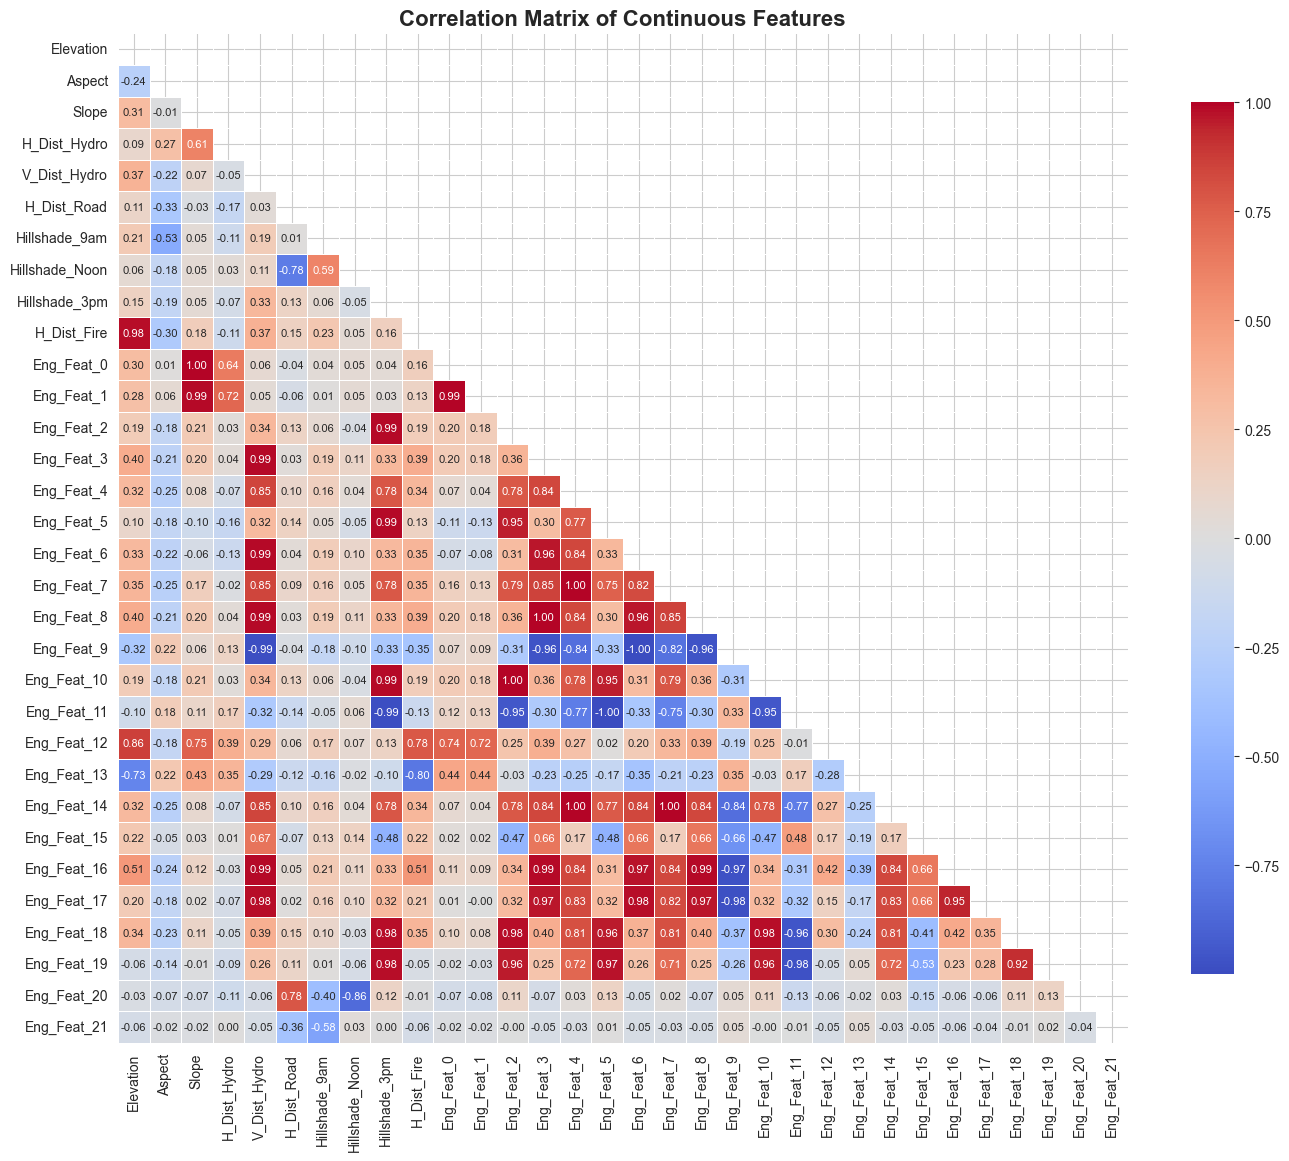

✓ Correlation heatmap saved


In [12]:
print("Generating Correlation Heatmap...")
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, 
    mask=mask, 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}, 
    annot=True, 
    fmt=".2f",
    annot_kws={'size': 8}
)
plt.title('Correlation Matrix of Continuous Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'eda_correlation.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Correlation heatmap saved")

## 13. Identify Highly Correlated Features

In [13]:
threshold = 0.7
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

if high_corr_pairs:
    print(f"\nHighly Correlated Feature Pairs (|correlation| > {threshold}):")
    print("=" * 70)
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"{feat1:25s} <-> {feat2:25s}: {corr_val:6.3f}")
else:
    print(f"\nNo feature pairs with |correlation| > {threshold} found.")


Highly Correlated Feature Pairs (|correlation| > 0.7):
Elevation                 <-> H_Dist_Fire              :  0.978
Elevation                 <-> Eng_Feat_12              :  0.863
Elevation                 <-> Eng_Feat_13              : -0.728
Slope                     <-> Eng_Feat_0               :  0.999
Slope                     <-> Eng_Feat_1               :  0.986
Slope                     <-> Eng_Feat_12              :  0.746
H_Dist_Hydro              <-> Eng_Feat_1               :  0.721
V_Dist_Hydro              <-> Eng_Feat_3               :  0.991
V_Dist_Hydro              <-> Eng_Feat_4               :  0.848
V_Dist_Hydro              <-> Eng_Feat_6               :  0.991
V_Dist_Hydro              <-> Eng_Feat_7               :  0.845
V_Dist_Hydro              <-> Eng_Feat_8               :  0.991
V_Dist_Hydro              <-> Eng_Feat_9               : -0.991
V_Dist_Hydro              <-> Eng_Feat_14              :  0.848
V_Dist_Hydro              <-> Eng_Feat_16       

## 14. Summary

In [14]:
print("\n" + "=" * 70)
print("EDA COMPLETE")
print("=" * 70)
print(f"✓ Analyzed {len(y_all):,} total samples")
print(f"✓ 7 forest cover types identified")
print(f"✓ {num_features} features analyzed")
print(f"✓ Images saved to: {image_dir}")
print("\nGenerated Files:")
print(f"  - eda_class_distribution.png")
print(f"  - eda_correlation.png")


EDA COMPLETE
✓ Analyzed 581,012 total samples
✓ 7 forest cover types identified
✓ 32 features analyzed
✓ Images saved to: C:\PYTHON\AIT511 Course Project 2\archive\images\Chapter-7

Generated Files:
  - eda_class_distribution.png
  - eda_correlation.png
